# Worldwide Gender differences in School Performance 
## by Daniel Leirer

## Investigation Overview

In this analysis I wanted to explore gender differences in school performance around the world. 

## Dataset Overview

The dataset used here is the PISA 2012 data, which contains data on 485,490 students belonging to 66 countries. 
The dataset includes demographic information, test scores, and questionairs relating to wealth, wellbeing, and school performance. 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#magic for matplotlib
%matplotlib inline

#make data folder
data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
#read in dictionary with columns to keep.
dictionary_filename = os.path.join(data_dir,"pisadict2012want.csv")
df_pdic = pd.read_csv(dictionary_filename, sep=",",encoding = "ISO-8859-1")

#Check how many columns to keep
df_pdic.columnwant.value_counts()
#create list of columns to keep.
df_pdic = df_pdic.loc[df_pdic["columnwant"] == "y",:]
column_names_list= df_pdic.column_names

#load pisa data limited to selected columns. 
pisa_filename = os.path.join(data_dir,"pisa2012.csv")

#df_pisa = pd.read_csv(pisa_filename,sep=",",encoding = "ISO-8859-1",index_col=0)
df_pisa_full = pd.read_csv(pisa_filename,sep=",",encoding = "ISO-8859-1",index_col=0, usecols = column_names_list)

## Jordan has the highest Gender perfomance gap

Gender difference is calulated for each country by subtracting the mean female score from the mean male score.  
Jordan and Qatar are unusual in that girls outperform males in all subjects. 

Why is that? In general we would expect the reverse especially in maths. 



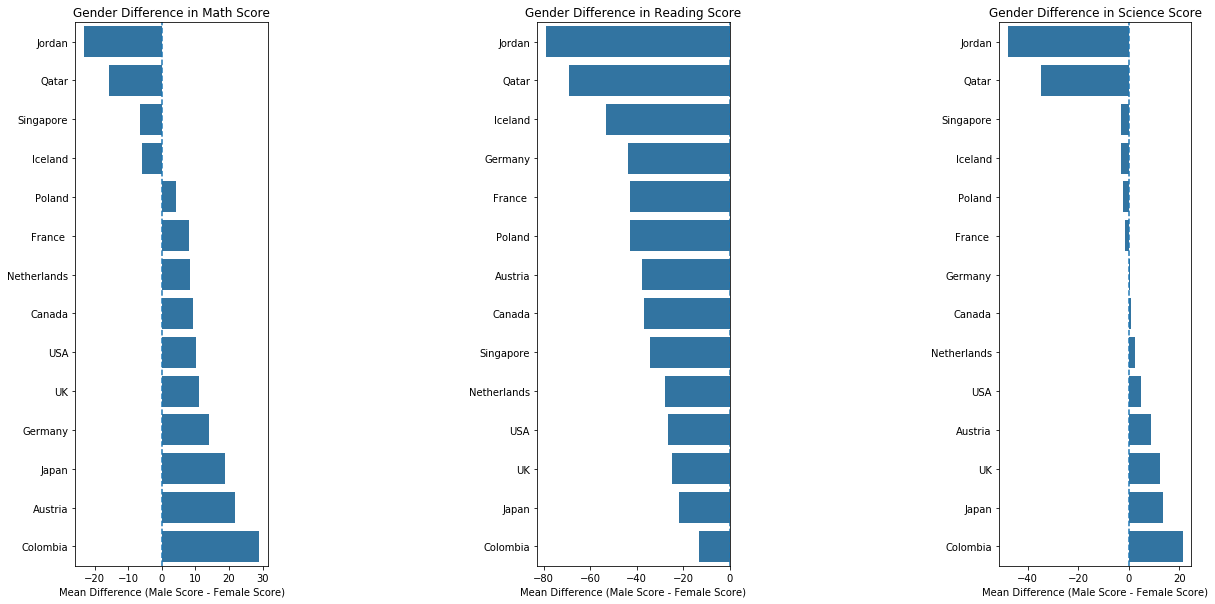

In [8]:
### list of interesting countries 
country_list = ['Jordan ', 'Iceland','Singapore','Japan','Colombia ','Austria','Qatar', 'United States of America ', 'United Kingdom (excl.Scotland) ','Germany','Netherlands','France ', 'Poland ','Canada ']

#subset main df to interesting countries.
df_pisa = df_pisa_full[df_pisa_full['NC'].isin(country_list)]
#Change country names
df_pisa.NC.replace(country_list, ['Jordan', 'Iceland','Singapore','Japan','Colombia','Austria','Qatar', 'USA', 'UK','Germany','Netherlands','France ', 'Poland','Canada'],inplace=True)


#calculate mean score for men, mean score for women, and difference. 
#df_mean_diff_maths= pa
df_gm_mean = df_pisa[["PV5MATH","PV5READ","PV5SCIE","ST04Q01","NC"]].groupby(by=["NC","ST04Q01"]).mean().reset_index()
#pivot to have seperate gender columns
df_gm_math_diff=df_gm_mean.pivot(index="NC",columns='ST04Q01', values=["PV5MATH","PV5READ","PV5SCIE"])
#calculate mean score across subjects for each country. (Row mean)
df_gm_math_diff["Mean_score"]= df_gm_math_diff.mean(axis=1)
#assign ranks based on mean score
df_gm_math_diff["Mean_score_rank"]= df_gm_math_diff.Mean_score.rank(ascending =False)
#loop through all 3 categories
for i_col in ["PV5MATH","PV5READ","PV5SCIE"]:
    #for each category mean male - mean female
    df_gm_math_diff[i_col+'_gdiff']=df_gm_math_diff[i_col]["Male"]-df_gm_math_diff[i_col]["Female"]
    

#bin by achievement for each country
df_gm_math_diff["Achievement_bins"] = pd.qcut(df_gm_math_diff.Mean_score, 3, labels=["Low","Medium","High"])

plt.figure(figsize = [20,10 ])

#plot settings
base_color = sns.color_palette()[0]


# left plot
Gender_diff="PV5MATH_gdiff"
plt.subplot(1,5, 1)
gc = sns.barplot(x=Gender_diff,y="NC",data=df_gm_math_diff.sort_values(Gender_diff).reset_index(),color = base_color)
gc.axvline(0, ls='--');
plt.title("Gender Difference in Math Score");
plt.ylabel("");
plt.xlabel("Mean Difference (Male Score - Female Score)");


# middle plot
Gender_diff="PV5READ_gdiff"
plt.subplot(1,5, 3)
gc = sns.barplot(x=Gender_diff,y="NC",data=df_gm_math_diff.sort_values(Gender_diff).reset_index(),color = base_color)
gc.axvline(0, ls='--');
plt.title("Gender Difference in Reading Score");
plt.ylabel("");
plt.xlabel("Mean Difference (Male Score - Female Score)");

# right plot

Gender_diff="PV5SCIE_gdiff"
plt.subplot(1,5, 5)
gc = sns.barplot(x=Gender_diff,y="NC",data=df_gm_math_diff.sort_values(Gender_diff).reset_index(),color = base_color)
gc.axvline(0, ls='--');
plt.title("Gender Difference in Science Score");
plt.ylabel("");
plt.xlabel("Mean Difference (Male Score - Female Score)");


## Jordans Male students are more likely to feel School is a waste of time:

Out of all countries looked at, Male students in Jordan were by far the most likely to "Strongly Agree" or "Agree" that School is a waste of time. They were also much more likely to feel this way than female students.  In fact the attitude of female students in Jordan was similair to that of female students in other countries. 



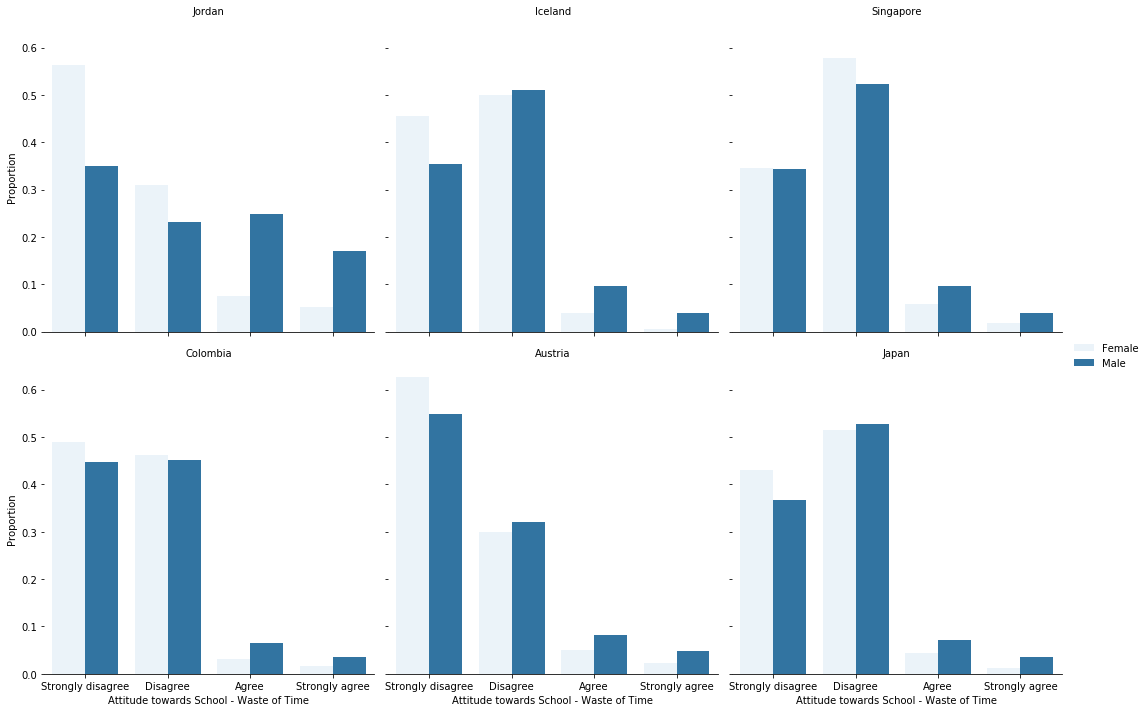

In [55]:
### list of interesting countries 
country_list = ['Jordan ', 'Iceland','Singapore','Colombia ','Austria','Japan']
#subset main df to interesting countries.
df_pisa = df_pisa_full[df_pisa_full['NC'].isin(country_list)]
#Change country names
country_list2 = ['Jordan', 'Iceland','Singapore','Colombia','Austria','Japan']
df_pisa.NC.replace(country_list, country_list2 ,inplace=True)


#get columns to plot
temp_var="ST88Q02"
gender ="ST04Q01"
#define category order
cat_order= ['Strongly disagree', 'Disagree','Agree','Strongly agree']


#get proportion for 
temp_df=df_pisa.groupby(["NC",gender])[temp_var].value_counts(normalize=True).rename("Proportion").reset_index()


g = sns.catplot(data=temp_df, x=temp_var, y="Proportion", hue=gender,
                col="NC", kind='bar',order=cat_order,col_wrap=3,
                sharex=True,sharey=True,color = base_color,legend=False,col_order = country_list2)
g.add_legend();
(g.set_axis_labels("Attitude towards School - Waste of Time","Proportion")
     .set_titles("{col_name}")
     .despine(left=True));


## Approximately 40% of Jordans Male students feel like outsiders:

Out of all countries looked at Male students in Jordan were by far the most liekly to state that they felt like outsiders.
Approximately 40% of male students selected "Strongly Agree" or "Agree" when asked if they felt like outsiders. For a country like Austria this number was closer to 10%.  
This overall indicates that Male students in Jordan do not feel like they belong in a school enviroment compared to their international peers. 




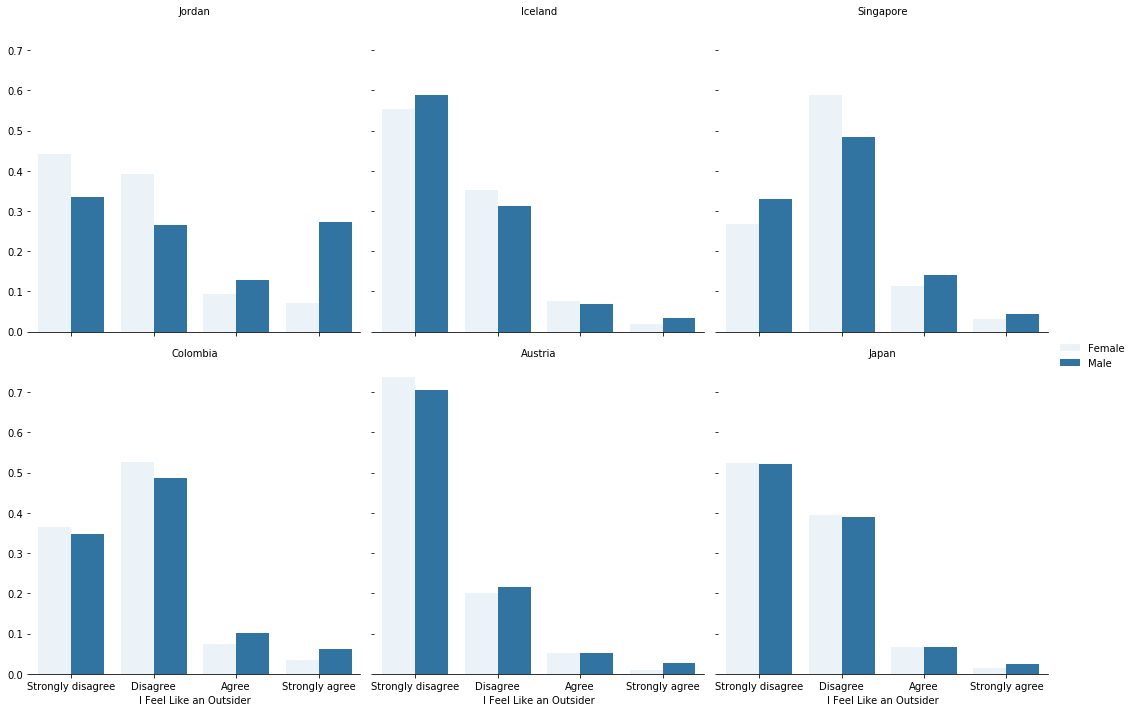

In [46]:
### list of interesting countries 
country_list = ['Jordan ', 'Iceland','Singapore','Colombia ','Austria','Japan']
#subset main df to interesting countries.
df_pisa = df_pisa_full[df_pisa_full['NC'].isin(country_list)]
#Change country names
country_list2 = ['Jordan', 'Iceland','Singapore','Colombia','Austria','Japan']
df_pisa.NC.replace(country_list, country_list2 ,inplace=True)
#get columns to plot
temp_var="ST87Q01"

#define category order
cat_order= ['Strongly disagree', 'Disagree','Agree','Strongly agree']
#plt.figure(figsize = [20,20])

#get proportion for 
temp_df=df_pisa.groupby(["NC","ST04Q01"])[temp_var].value_counts(normalize=True).rename("Proportion").reset_index()
temp_df


g = sns.catplot(data=temp_df, x="ST87Q01", y="Proportion", hue="ST04Q01",
                col="NC", kind='bar',order=cat_order,col_wrap=3,
                sharex=True,sharey=True,color = base_color,legend=False,col_order = country_list2)
g.add_legend();
#g.plt.xlabel("Sense of Belonging - Feel Like Outsider")
(g.set_axis_labels("I Feel Like an Outsider","")
     .set_titles("{col_name}")
     .despine(left=True));



## Feeling like an outsider is associated with Math Score:

In most countries there is an association between feelings of belonging and academic achievement. The more students feel lonely, isolated and like outsiders the more their grades tend to suffer. While this is by no means the only variable affecting student outcomes, it captures some of the variability. In jordan we see an increase in grades for male students who dont feel isolated. While this does not eliminate the gender gap it goes some way in narrowing it. 



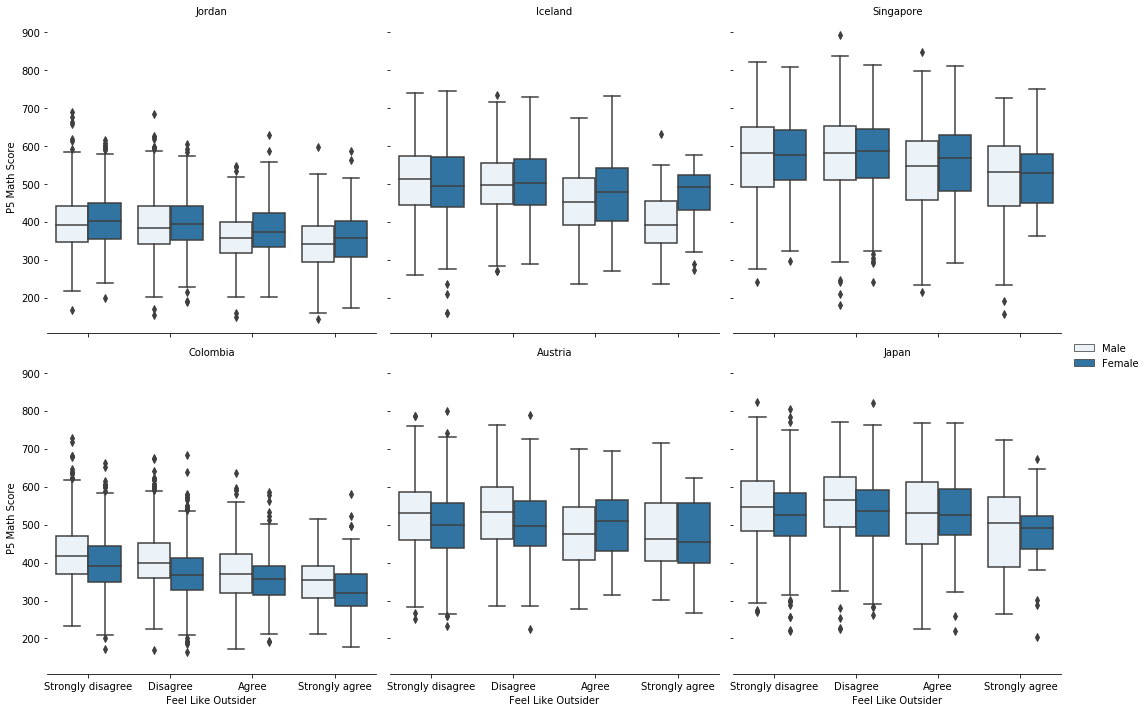

In [50]:
### Make boxplots by country
gender="ST04Q01"
country="NC"
score="PV5MATH"


g = sns.catplot(data=df_pisa, x="ST87Q01", y=score, hue=gender,
                col="NC", kind='box',col_wrap=3, sharex=True,sharey=True,color = base_color,legend=False,col_order = country_list2)
g.add_legend();
(g.set_axis_labels("Feel Like Outsider","P5 Math Score")
     .set_titles("{col_name}")
     .despine(left=True));  

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!